# Neural Network Classification with PyTorch

In [1]:
# Import Required Modules
import sklearn
from sklearn.datasets import make_circles
import pandas as pd
import numpy as np
import torch
from torch import nn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Making DataSet
n_samples = 1000

X,y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
print(f'First Five sample of X: {X[:5]}')
print(f'First Five sample of Y: {y[:5]}')

First Five sample of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First Five sample of Y: [1 1 1 1 0]


In [5]:
# Make DataFrame of Circle data
circles = pd.DataFrame({"X1":X[:,0],
                        "X2": X[:,1],
                        "label": y
                        })

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


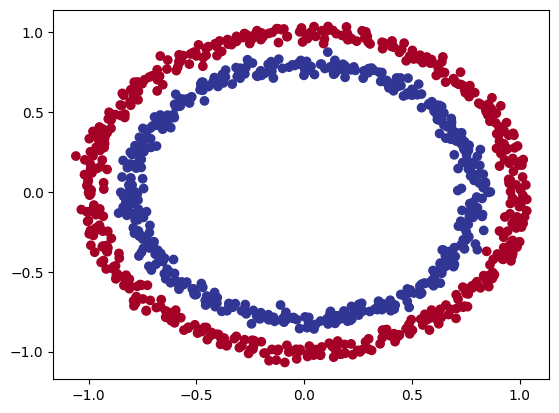

In [6]:
# Visualize
plt.scatter(
            x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu
            )

# Checking input and output shapes

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
# View the first example of feature and labels
x_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {x_sample} and for y: {y_sample}")
print(f'shape of x_sample: {x_sample.shape} and y_sample: {y_sample.shape}')

Values for one sample of X: [0.75424625 0.23148074] and for y: 1
shape of x_sample: (2,) and y_sample: ()


In [9]:
#Convert dataframe numpy to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

type(X),X.dtype,y.dtype


(torch.Tensor, torch.float32, torch.float32)

In [10]:
torch.manual_seed(42)

In [11]:
# Spliting data
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [12]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [13]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Building model

In [14]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2,out_features=5)
        self.layer_2 = nn.Linear(in_features=5,out_features=1)

    def forward(self,x):
        return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
# Replicate the model with nn.sequential
model_0 = nn.Sequential(
    nn.Linear(2,5),
    nn.Linear(5,1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
#make prediction
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f'Lenght of untrained_preds: {len(untrained_preds)}, Shape of untrained_preds: {untrained_preds.shape}')
print(f'First 5 untrained_preds: {untrained_preds[:5]}')    

Lenght of untrained_preds: 200, Shape of untrained_preds: torch.Size([200, 1])
First 5 untrained_preds: tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')


In [17]:
#Setup a loss fns and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model_0.parameters(),lr=0.1)

In [18]:
def accuracy(y_true,y_pred):
    return (torch.eq(y_true,y_pred).sum().item()/len(y_true))*100

In [19]:
# View the first 5 outputs of the forward pass
model_0.eval()
with torch.inference_mode():
    y__logits = model_0(X_test.to(device))[:5]
y__logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [20]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

In [21]:
y_preds = torch.round(torch.sigmoid(y__logits)) # convert logits to probability
y_preds

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [22]:
y_preds = torch.round(torch.sigmoid(y__logits)) # convert logits to probability 
y_preds

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

# Building a training and testing loop

In [23]:
torch.cuda.manual_seed(42)

# set the epochs
epochs = 100

#data in gpu
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    
    #training mode
    model_0.train()

    #Forward pass
    y__logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y__logits))

    #calculate loss
    loss = loss_fn(y__logits,y_train)

    #Accuracy
    acc = accuracy(y_train,y_pred)

    #Zero the gradients
    optimizer.zero_grad()

    #Backward pass
    loss.backward()

    #Optimize step
    optimizer.step()

    #Testing
    model_0.eval()
    with torch.inference_mode():
        y__logits_test = model_0(X_test).squeeze()
        y_pred_test = torch.round(torch.sigmoid(y__logits_test))
        loss_test = loss_fn(y__logits_test,y_test)
        acc_test = accuracy(y_test,y_pred_test)

    #Print the result
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {loss_test:.5f} | Test Acc: {acc_test:.2f}")


Epoch: 0 | Loss: 0.69796 | Acc: 51.88 | Test Loss: 0.69562 | Test Acc: 50.00
Epoch: 10 | Loss: 0.69374 | Acc: 50.50 | Test Loss: 0.69416 | Test Acc: 52.50
Epoch: 20 | Loss: 0.69317 | Acc: 51.38 | Test Loss: 0.69587 | Test Acc: 46.00
Epoch: 30 | Loss: 0.69303 | Acc: 50.12 | Test Loss: 0.69438 | Test Acc: 46.00
Epoch: 40 | Loss: 0.69299 | Acc: 50.88 | Test Loss: 0.69505 | Test Acc: 46.00
Epoch: 50 | Loss: 0.69298 | Acc: 51.62 | Test Loss: 0.69457 | Test Acc: 46.50
Epoch: 60 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69465 | Test Acc: 47.00
Epoch: 70 | Loss: 0.69298 | Acc: 51.25 | Test Loss: 0.69468 | Test Acc: 45.50
Epoch: 80 | Loss: 0.69298 | Acc: 51.50 | Test Loss: 0.69464 | Test Acc: 45.50
Epoch: 90 | Loss: 0.69298 | Acc: 51.38 | Test Loss: 0.69469 | Test Acc: 45.50


In [24]:
import requests
from pathlib import Path 
import torchvision

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


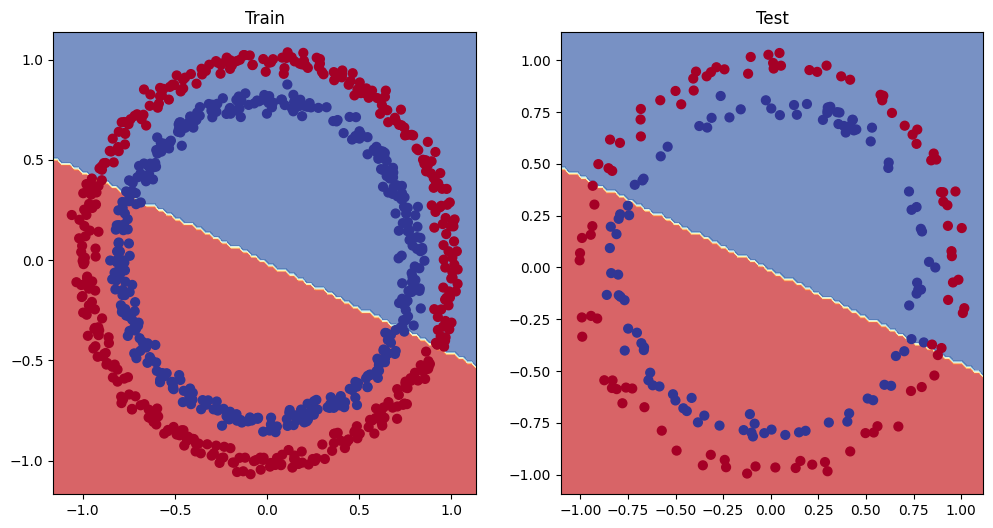

In [25]:
# Check the decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)
plt.show()


# Improving model

In [26]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [27]:
#loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_1.parameters(),lr=0.1)
# Set the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the epochs
epochs = 1000

# Data in GPU
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    #training mode
    model_1.train()

    #forward pass
    y__logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y__logits))

    #calculate loss
    loss = loss_fn(y__logits,y_train)
    acc = accuracy(y_train,y_pred)

    #optimize zero grad
    optimizer.zero_grad()

    #backward pass
    loss.backward()

    #optimize step
    optimizer.step()

    #testing
    model_1.eval()
    with torch.inference_mode():
        y__logits_test = model_1(X_test).squeeze()
        y_pred_test = torch.round(torch.sigmoid(y__logits_test))
        loss_test = loss_fn(y__logits_test,y_test)
        acc_test = accuracy(y_test,y_pred_test)

    #print the result
    if epoch%100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {loss_test:.5f} | Test Acc: {acc_test:.2f}")

Epoch: 0 | Loss: 0.69713 | Acc: 50.00 | Test Loss: 0.69594 | Test Acc: 50.00
Epoch: 100 | Loss: 0.69327 | Acc: 49.62 | Test Loss: 0.69334 | Test Acc: 54.00
Epoch: 200 | Loss: 0.69311 | Acc: 49.88 | Test Loss: 0.69357 | Test Acc: 50.00
Epoch: 300 | Loss: 0.69305 | Acc: 50.62 | Test Loss: 0.69384 | Test Acc: 49.50
Epoch: 400 | Loss: 0.69301 | Acc: 50.50 | Test Loss: 0.69407 | Test Acc: 46.00
Epoch: 500 | Loss: 0.69300 | Acc: 51.00 | Test Loss: 0.69425 | Test Acc: 47.50
Epoch: 600 | Loss: 0.69299 | Acc: 51.50 | Test Loss: 0.69438 | Test Acc: 47.00
Epoch: 700 | Loss: 0.69298 | Acc: 50.88 | Test Loss: 0.69447 | Test Acc: 46.50
Epoch: 800 | Loss: 0.69298 | Acc: 51.00 | Test Loss: 0.69453 | Test Acc: 46.00
Epoch: 900 | Loss: 0.69298 | Acc: 51.50 | Test Loss: 0.69458 | Test Acc: 46.00


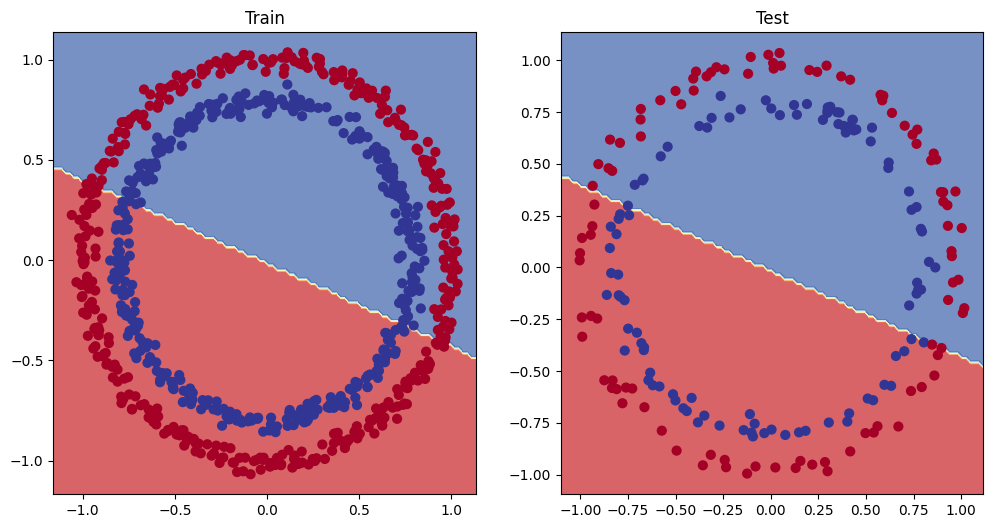

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
plt.show()

In [29]:
# prepare new data to test the model
# Create *Known* Parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
x_new = torch.arange(start, end, step).unsqueeze(1)
y_new = weight * x_new + bias

x_new[: 10], y_new[: 10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [30]:
#split the data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2, random_state=42)


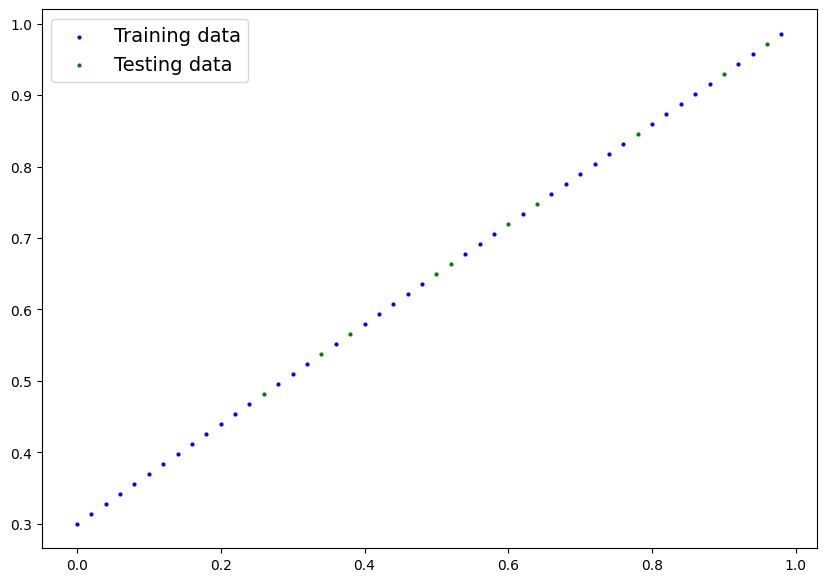

In [31]:
plot_predictions(X_train_new, y_train_new, X_test_new, y_test_new)

In [32]:
model_cpy = nn.Sequential(
    nn.Linear(1, 10),
    nn.Linear(10, 10),
    nn.Linear(10, 1)
).to(device)
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_cpy.parameters(), lr=0.01)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the epochs
epochs = 1000

# Data in GPU
X_train_new = X_train_new.to(device)
y_train_new = y_train_new.to(device)
X_test_new = X_test_new.to(device)
y_test_new = y_test_new.to(device)

for epoch in range(epochs):
    # Training mode
    model_cpy.train()

    # Forward pass
    y_pred_new = model_cpy(X_train_new)

    # Calculate loss
    loss = loss_fn(y_pred_new, y_train_new)

    # Zero the gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Optimize step
    optimizer.step()

    # Testing
    model_cpy.eval()
    with torch.inference_mode():
        y_test_pred_new = model_cpy(X_test_new)
        loss_test_new = loss_fn(y_test_pred_new, y_test_new)

    # Print the result
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {loss_test_new:.5f}")
        

Epoch: 0 | Loss: 0.78723 | Test Loss: 0.79374
Epoch: 100 | Loss: 0.00704 | Test Loss: 0.03604
Epoch: 200 | Loss: 0.01146 | Test Loss: 0.03115
Epoch: 300 | Loss: 0.01311 | Test Loss: 0.02927
Epoch: 400 | Loss: 0.01482 | Test Loss: 0.02696
Epoch: 500 | Loss: 0.01381 | Test Loss: 0.02693
Epoch: 600 | Loss: 0.01406 | Test Loss: 0.02573
Epoch: 700 | Loss: 0.01336 | Test Loss: 0.02343
Epoch: 800 | Loss: 0.01335 | Test Loss: 0.02490
Epoch: 900 | Loss: 0.01323 | Test Loss: 0.02421


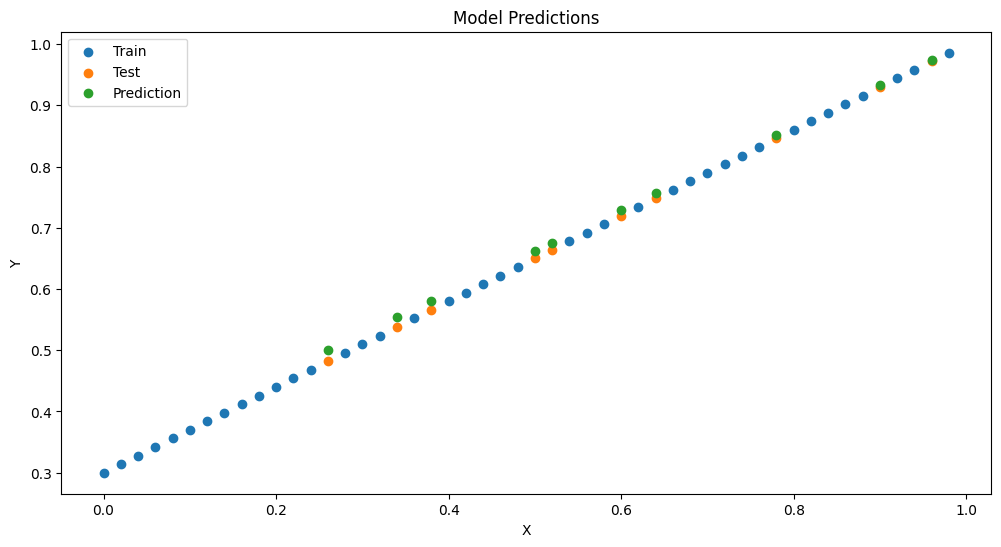

In [33]:
model_cpy.eval()

# Make predictions
with torch.inference_mode():
    y_pred_new = model_cpy(X_test_new)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.title("Model Predictions")
plt.ylabel("Y")
plt.xlabel("X")
plt.scatter(X_train_new.cpu(), y_train_new.cpu(), label="Train")
plt.scatter(X_test_new.cpu(), y_test_new.cpu(), label="Test")
plt.scatter(X_test_new.cpu(), y_pred_new.cpu(), label="Prediction")
plt.legend()
plt.show()

In [34]:
#Build a model to predict with non - linearity
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2,10)
        self.layer_2 = nn.Linear(10,10)
        self.layer_3 = nn.Linear(10,1)
        self.relu = nn.ReLU()

    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_2 = CircleModelV2().to(device)
model_2

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [35]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_2.parameters(),lr=0.1)

In [36]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the epochs
epochs = 1000

# Data in GPU
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    # Training mode
    model_2.train()

    # Forward pass
    y__logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y__logits))

    # Calculate loss
    loss = loss_fn(y__logits, y_train)
    acc = accuracy(y_train, y_pred)

    # Zero grad
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Optimize step
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        y__logits_test = model_2(X_test).squeeze()
        y_pred_test = torch.round(torch.sigmoid(y__logits_test))
        loss_test = loss_fn(y__logits_test, y_test)
        acc_test = accuracy(y_test, y_pred_test)
        
    # Print the result
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {loss_test:.5f} | Test Acc: {acc_test:.2f}")
    

Epoch: 0 | Loss: 0.69295 | Acc: 50.00 | Test Loss: 0.69319 | Test Acc: 50.00
Epoch: 100 | Loss: 0.69115 | Acc: 52.88 | Test Loss: 0.69102 | Test Acc: 52.50
Epoch: 200 | Loss: 0.68977 | Acc: 53.37 | Test Loss: 0.68940 | Test Acc: 55.00
Epoch: 300 | Loss: 0.68795 | Acc: 53.00 | Test Loss: 0.68723 | Test Acc: 56.00
Epoch: 400 | Loss: 0.68517 | Acc: 52.75 | Test Loss: 0.68411 | Test Acc: 56.50
Epoch: 500 | Loss: 0.68102 | Acc: 52.75 | Test Loss: 0.67941 | Test Acc: 56.50
Epoch: 600 | Loss: 0.67515 | Acc: 54.50 | Test Loss: 0.67285 | Test Acc: 56.00
Epoch: 700 | Loss: 0.66659 | Acc: 58.38 | Test Loss: 0.66322 | Test Acc: 59.00
Epoch: 800 | Loss: 0.65160 | Acc: 64.00 | Test Loss: 0.64757 | Test Acc: 67.50
Epoch: 900 | Loss: 0.62362 | Acc: 74.00 | Test Loss: 0.62145 | Test Acc: 79.00


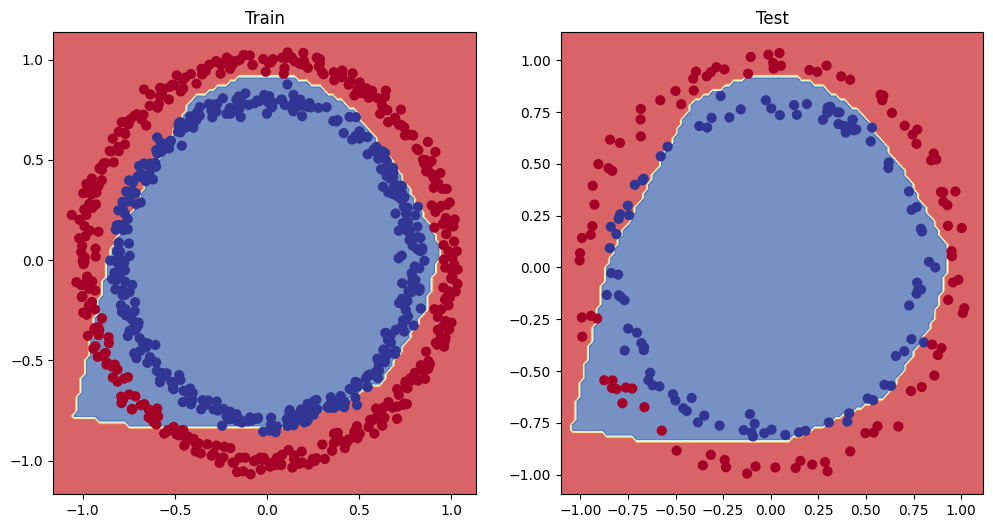

In [37]:
#Evaluate the model
model_2.eval()

# Make predictions
with torch.inference_mode():
    y_pred = model_2(X_test)

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)
plt.show()

# Putting all together
### using toy multi-class database

In [38]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

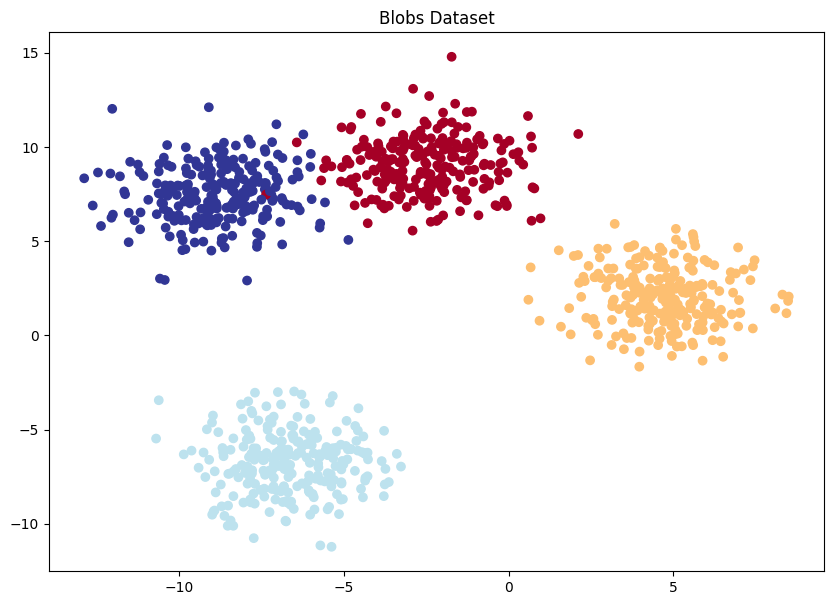

In [39]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#data creation
x_blobs, y_blobs = make_blobs(
                              n_samples=1000, 
                              cluster_std=1.5, 
                              centers=NUM_CLASSES, 
                              n_features=NUM_FEATURES,
                              random_state=RANDOM_SEED)

# Convert to tensors
x_blobs = torch.from_numpy(x_blobs).type(torch.float)
y_blobs = torch.from_numpy(y_blobs).type(torch.float)

# Split the data
x_bl0bs_train, x_blobs_test, y_blobs_train, y_blobs_test = train_test_split(x_blobs, y_blobs, test_size=0.2, random_state=RANDOM_SEED)

# Visualize the data
plt.figure(figsize=(10, 7))
plt.scatter(x_blobs[:, 0], x_blobs[:, 1], c=y_blobs, cmap=plt.cm.RdYlBu)
plt.title("Blobs Dataset")
plt.show()


In [40]:
#creating a model
class BlobsModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)
    
model_blobs = BlobsModel(input_features=2, output_features=4).to(device)
model_blobs

BlobsModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [41]:
# loss fns and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_blobs.parameters(), lr=0.1)

In [44]:
#prediting the model
model_blobs.eval()
with torch.inference_mode():
    y__logits = model_blobs(x_blobs_test.to(device))

print(f"Length of y__logits: {len(y__logits)}, Shape of y__logits: {y__logits.shape}")
y__logits[:5]

Length of y__logits: 200, Shape of y__logits: torch.Size([200, 4])


tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')

In [45]:
#convert our models logit output to probabilities
y_pred_probs = torch.softmax(y__logits, dim=1)
print(y__logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [51]:
#convert the probabilities to class labels
y_pred = torch.argmax(y_pred_probs, dim=1)
y_pred[:20] == y_blobs_test[:20].to(device)

tensor([ True, False, False, False,  True, False, False,  True, False,  True,
         True,  True,  True,  True,  True, False, False, False, False, False],
       device='cuda:0')

In [55]:
#creating training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the epochs
epochs = 100

# Data in GPU
x_blobs_train = x_bl0bs_train.to(device)
y_blobs_train = y_blobs_train.to(device)
x_blobs_test = x_blobs_test.to(device)
y_blobs_test = y_blobs_test.to(device)

#loop
for epoch in range(epochs):
    #train
    model_blobs.train()

    #forward pass
    y__logits = model_blobs(x_blobs_train)
    y_pred_probs = torch.softmax(y__logits, dim=1)

    #calculate loss
    loss = loss_fn(y__logits, y_blobs_train.long())
    acc = torch.sum(torch.argmax(y_pred_probs, dim=1) == y_blobs_train).item() / len(y_blobs_train)

    #zero grad
    optimizer.zero_grad()

    #backward pass
    loss.backward()

    #optimize step
    optimizer.step()

    #testing
    model_blobs.eval()
    with torch.inference_mode():
        y__logits_test = model_blobs(x_blobs_test)
        y_pred_probs_test = torch.softmax(y__logits_test, dim=1)
        loss_test = loss_fn(y__logits_test, y_blobs_test.long())
        acc_test = torch.sum(torch.argmax(y_pred_probs_test, dim=1) == y_blobs_test).item() / len(y_blobs_test)

    #print the result
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test Loss: {loss_test:.5f} | Test Acc: {acc_test:.2f}")


Epoch: 0 | Loss: 1.06362 | Acc: 0.55 | Test Loss: 1.00386 | Test Acc: 0.55
Epoch: 10 | Loss: 0.62096 | Acc: 0.97 | Test Loss: 0.63668 | Test Acc: 0.98
Epoch: 20 | Loss: 0.40612 | Acc: 0.99 | Test Loss: 0.41038 | Test Acc: 1.00
Epoch: 30 | Loss: 0.23616 | Acc: 0.99 | Test Loss: 0.22684 | Test Acc: 0.99
Epoch: 40 | Loss: 0.10442 | Acc: 0.99 | Test Loss: 0.09487 | Test Acc: 0.99
Epoch: 50 | Loss: 0.06402 | Acc: 0.99 | Test Loss: 0.05627 | Test Acc: 0.99
Epoch: 60 | Loss: 0.04968 | Acc: 0.99 | Test Loss: 0.04191 | Test Acc: 0.99
Epoch: 70 | Loss: 0.04243 | Acc: 0.99 | Test Loss: 0.03429 | Test Acc: 0.99
Epoch: 80 | Loss: 0.03799 | Acc: 0.99 | Test Loss: 0.02949 | Test Acc: 0.99
Epoch: 90 | Loss: 0.03501 | Acc: 0.99 | Test Loss: 0.02637 | Test Acc: 0.99


In [56]:
# Make predictions
model_blobs.eval()
with torch.inference_mode():
    y__logits = model_blobs(x_blobs_test)
    y_pred_probs = torch.softmax(y__logits, dim=1)
    y_pred = torch.argmax(y_pred_probs, dim=1)

y_pred[:10], y_blobs_test[:10]

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0'),
 tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.], device='cuda:0'))

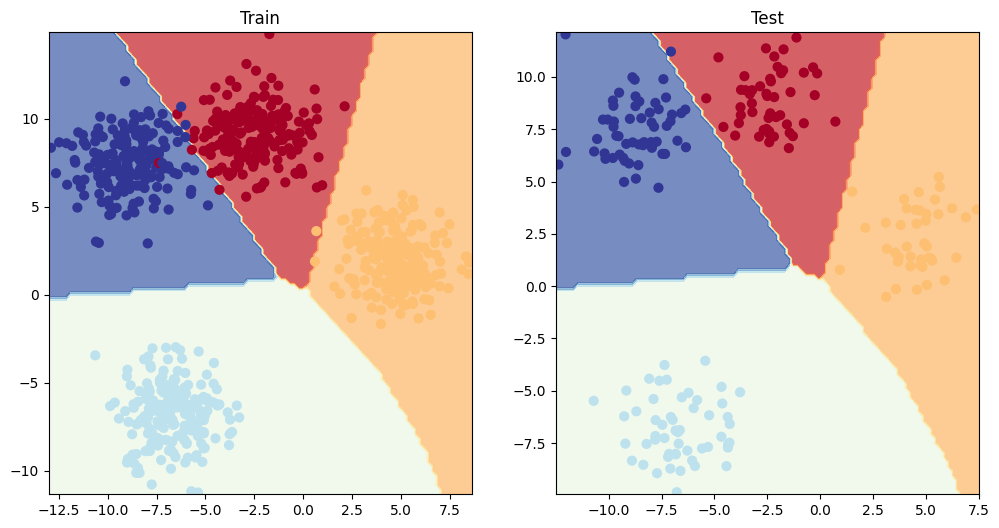

In [57]:
#visualize the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_blobs, x_bl0bs_train, y_blobs_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_blobs, x_blobs_test, y_blobs_test)
plt.show()


# -- The End --